<a href="https://colab.research.google.com/github/mdabushad/Breast-Cancer-Prediction/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Breast Cancer Prediction Using ML**

## Import Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Downloading Dataset From Kaggle

In [17]:
#Setting- Up Kagggle API Credentials
import os
os.environ['KAGGLE_USERNAME'] = "mdabushad"
os.environ['KAGGLE_KEY'] = "512195e4116213d6fa87d3986c6708de"

# Downloading the Breast Cancer dataset
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data


breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [18]:
# Unzip the downloaded dataset
!unzip /content/breast-cancer-wisconsin-data.zip 

Archive:  /content/breast-cancer-wisconsin-data.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Load the Breast Cancer Dataset and Explore



In [33]:
#importing the dataset
df = pd.read_csv("/content/data.csv")

In [34]:
#Preview the first few rows of the dataset using head().
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [35]:
#Check the dimensions of the dataset using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [36]:
#Examine the data types of each column using dtypes to understand the data format
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [37]:
#Calculate summary statistics of numerical columns using describe()
df.drop('id', axis=1).describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [38]:
#Count the number of Missing/null Values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [39]:
#Percentage of Null/Missing Values 
missing_percentage = (df.isnull().sum().sum() / np.product(df.shape)) * 100

print(f"Percentage of Null/Missing Values: {missing_percentage:.2f}%")

Percentage of Null/Missing Values: 3.03%


In [40]:
#Drop the missing values
df.dropna(axis = 1, inplace = True)

In [41]:
#Count the value of M(Malignant) and B(Benign)tumors.
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Label Encoding


In [42]:
#import the neccessary library
from sklearn.preprocessing import LabelEncoder

In [50]:
#Create an instance of the LabelEncoder
label_encoder = LabelEncoder()
#Fit and transform the LabelEncoder to the categorical column(diagnosis)
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [46]:
#Preview the first few rows of the encoded dataset using head().
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,encoded_diagnosis
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## Split the data and Perform Feature Scaling.

In [51]:
#Split the data into dependent and independent variables 
X = df.iloc[:, 2:].values
y = df.iloc[:,1].values


0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [53]:
#Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 123)

In [55]:
#Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-fold Cross-Validation and Build Logistic Regression Model

In [60]:
#Create a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [63]:
#Perform K-fold cross-validation
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits = 5, shuffle=True, random_state = 123)
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=kfold)

In [64]:
#Fit the logistic regression model on the entire training data
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [67]:
#Make predictions on the testing data
y_pred = logreg.predict(X_test_scaled)

#Print the predicted labels
print("Predicted Labels:", y_pred)

Predicted Labels: [0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0
 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1
 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1]


## Performance Evaluation


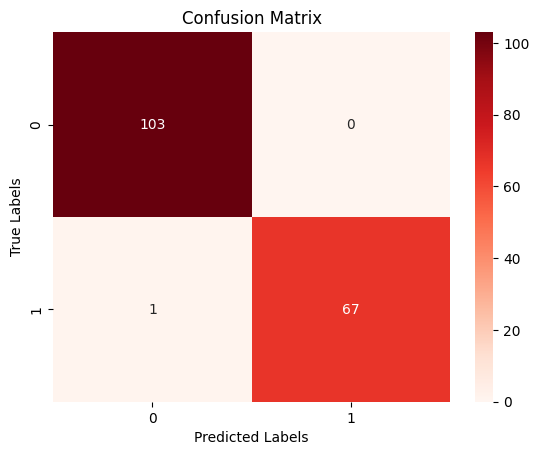

In [73]:
#import the evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, \
    precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# plot the Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, cmap='Reds', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [65]:
#Evaluate the model on the testing data
accuracy = logreg.score(X_test_scaled, y_test)

In [66]:
accuracy

0.9941520467836257